# Accessing and modifying pixel values

In [2]:
import numpy as np
import cv2 as cv

img = cv.imread('messi5.jpg')
assert img is not None, "file could not be read, check path"

#access the BGR value of pixel index (100,100)
px = img[100,100] 
print(px)

#access the blue value of pixel index(100,100)
blue = img[100,100,0]
print(blue)

img[100,100] = [255,255,255]
print(img[100,100])

cv.imshow("Gerni", img)
k = cv.waitKey(0)
if k==ord('s'):
    print("ok")

cv.destroyAllWindows()

[57 63 68]
57
[255 255 255]


# Accessing image props

In [3]:
print(img.shape) #dimensions 
print(img.size) #total pixels

(280, 450, 3)
378000


# Image ROI (region of images)

In [4]:
ball = img[240:280, 250:310]
img[0:40, 0:60] = ball
cv.imshow("Gerni", img)
k = cv.waitKey(0)
if k==ord('s'):
    print("ok")

cv.destroyAllWindows()

ok


# Splitting and merging channels

!WARNING: cv.split takes up resources and time a lot. Use numpy indexing instead

In [5]:
blue = img[:,:,0]
green = img[:,:,1]
red = img[:,:,2]
print(blue)

[[44 41 37 ... 55 53 53]
 [41 40 37 ... 59 58 56]
 [40 39 36 ... 63 62 59]
 ...
 [52 45 40 ... 53 57 57]
 [58 60 51 ... 58 64 64]
 [52 60 49 ... 57 52 52]]


# Making borders for images (padding)

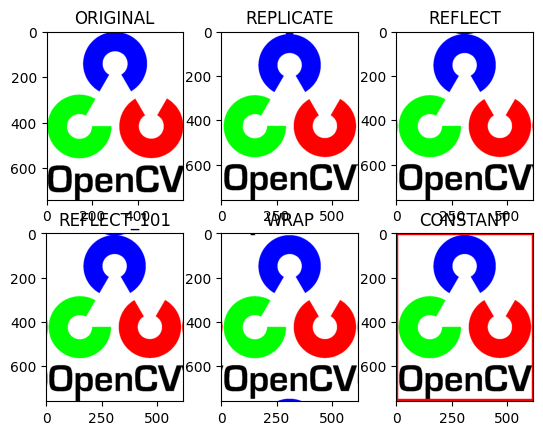

In [6]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

BLUE = [255,0,0]

img1 = cv.imread('opencv-logo.png')
assert img1 is not None, "file could not be read, check with os.path.exists()"

replicate = cv.copyMakeBorder(img1,10,10,10,10,cv.BORDER_REPLICATE)
reflect = cv.copyMakeBorder(img1,10,10,10,10,cv.BORDER_REFLECT)
reflect101 = cv.copyMakeBorder(img1,10,10,10,10,cv.BORDER_REFLECT_101)
wrap = cv.copyMakeBorder(img1,10,10,10,10,cv.BORDER_WRAP)
constant= cv.copyMakeBorder(img1,10,10,10,10,cv.BORDER_CONSTANT,value=BLUE)

plt.subplot(231),plt.imshow(img1,'gray'),plt.title('ORIGINAL')
plt.subplot(232),plt.imshow(replicate,'gray'),plt.title('REPLICATE')
plt.subplot(233),plt.imshow(reflect,'gray'),plt.title('REFLECT')
plt.subplot(234),plt.imshow(reflect101,'gray'),plt.title('REFLECT_101')
plt.subplot(235),plt.imshow(wrap,'gray'),plt.title('WRAP')
plt.subplot(236),plt.imshow(constant,'gray'),plt.title('CONSTANT')

plt.show()

# Image addition

In [9]:
x = np.array([[250]], dtype=np.uint8)
y = np.array([[10]], dtype=np.uint8)

print(cv.__file__)
print(cv.__version__)

print(x.shape, y.shape)
print(x.dtype, y.dtype)
print(cv.add(x,y))

print(x+y)

d:\CCCodes\.venv\Lib\site-packages\cv2\__init__.py
4.12.0
(1, 1) (1, 1)
uint8 uint8
[[255]]
[[4]]


# Image blending

In [2]:
import cv2 as cv
import numpy as np

img1 = cv.imread('ml.png')
img2 = cv.imread('opencv-logo.png')

assert img1 is not None, "error"
assert img2 is not None, "error"

dst = cv.addWeighted(img1,0.7,img2,0.3,0)

cv.imshow('dst', dst)
cv.waitKey(0)
cv.destroyAllWindows()

# Bitwise operations

In [5]:
import cv2 as cv
import numpy as np

img1 = cv.imread('messi5.jpg')
img2 = cv.imread('opencv-logo.png')

assert img1 is not None, "file could not be read, check with os.path.exists()"
assert img2 is not None, "file could not be read, check with os.path.exists()"
 
# I want to put logo on top-left corner, So I create a ROI
rows,cols,channels = img2.shape
roi = img1[0:rows, 0:cols]
 
# Now create a mask of logo and create its inverse mask also
img2gray = cv.cvtColor(img2,cv.COLOR_BGR2GRAY)
ret, mask = cv.threshold(img2gray, 10, 255, cv.THRESH_BINARY)
mask_inv = cv.bitwise_not(mask)
 
# Now black-out the area of logo in ROI
img1_bg = cv.bitwise_and(roi,roi,mask = mask_inv)
 
# Take only region of logo from logo image.
img2_fg = cv.bitwise_and(img2,img2,mask = mask)
 
# Put logo in ROI and modify the main image
dst = cv.add(img1_bg,img2_fg)
img1[0:rows, 0:cols ] = dst
 
cv.imshow('res',img1)
cv.waitKey(0)
cv.destroyAllWindows()

error: OpenCV(4.12.0) D:\a\opencv-python\opencv-python\opencv\modules\core\src\arithm.cpp:230: error: (-215:Assertion failed) (mtype == CV_8U || mtype == CV_8S) && _mask.sameSize(*psrc1) in function 'cv::binary_op'
